# **Logistics Regression**

### **Importing Libraries And Data**

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading Dataset

df = pd.read_csv(r"C:\Users\91939\Downloads\Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
# Printing 1st column

frame = df.loc["Serial No.":]
frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
frame = list(df.columns)
frame

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [9]:
df.columns[[8]]

Index(['Chance of Admit '], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017723603C88>]],
      dtype=object)

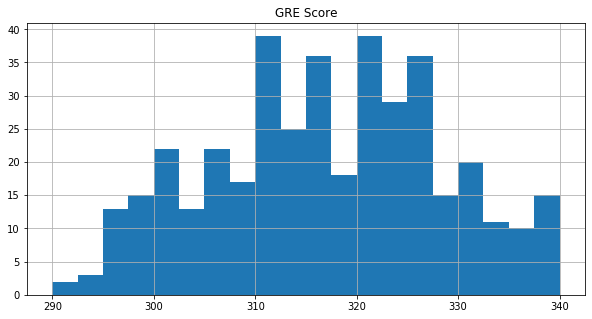

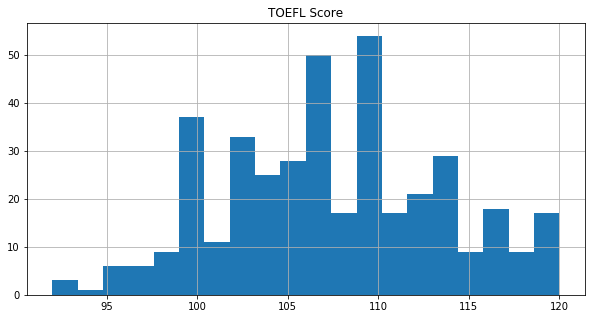

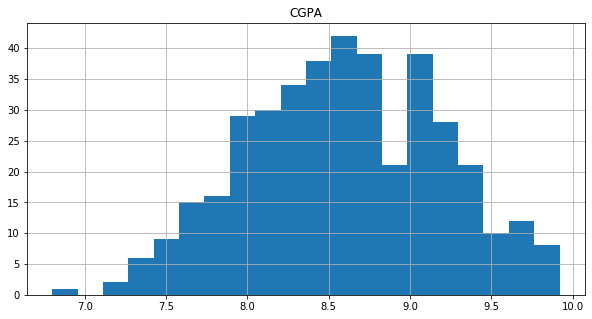

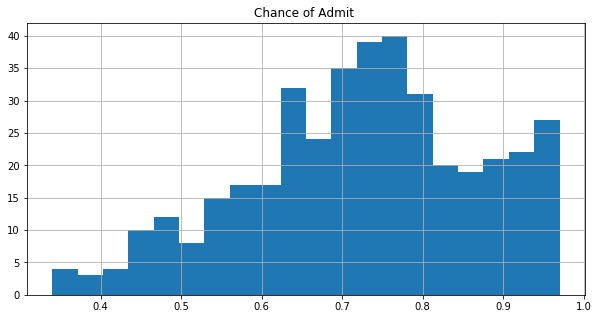

In [10]:
# Plotting histogram graphs

df.hist(column="GRE Score", bins=20, figsize=(10,5))
df.hist(column="TOEFL Score", bins=20, figsize=(10,5))
df.hist(column="CGPA", bins=20, figsize=(10,5))
df.hist(column="Chance of Admit ", bins=20, figsize=(10,5))

In [11]:
df.loc[1]

Serial No.             2.00
GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit        0.76
Name: 1, dtype: float64

In [12]:
# Dropping un-wanted values from DataFrame

X_df = df.drop(df.columns[[0, 2, 3, 4, 5, 6, 7, 8]], axis = 1)
Y_df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis = 1)

In [13]:
X_df.head()

,GRE Score
0,337
1,324
2,316
3,322
4,314


In [14]:
Y_df.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [15]:
# Converting DataFrame to Arrays

x_df = X_df.to_numpy()
y_df = Y_df.to_numpy()

In [16]:
#x_df

In [17]:
#y_df

In [18]:
# Changing y_df values to 1 or 0

for i in range(len(y_df)):
    if y_df[i] > 0.75:
        y_df[i] = 1
    else:
        y_df[i] = 0
        
#y_df

In [19]:
# Converting into DataFrame

Y_df = pd.DataFrame(y_df)
Y_df

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
395,1.0
396,1.0
397,1.0
398,0.0


In [20]:
# Printing shape to examine

print("Shape x_df : ", x_df.shape)
print("Shape y_df : ", y_df.shape)

Shape x_df :  (400, 1)
Shape y_df :  (400, 1)


In [21]:
# Changing x_df into Dataframe

X_df = pd.DataFrame(x_df)
X_df

,0
0,337
1,324
2,316
3,322
4,314
...,...
395,324
396,325
397,330
398,312


### **Dividing Into Train And Test Set**

In [22]:
# Splitting dataset into train and test data

X_train = X_df.sample(frac = 0.8, random_state = 200)
X_test = X_df.drop(X_train.index)

Y_train = Y_df.sample(frac = 0.8, random_state = 200)
Y_test = Y_df.drop(Y_train.index)

### **Converting DataFrame Into Array**

In [23]:
X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
Y_train_arr = Y_train.to_numpy()
Y_test_arr = Y_test.to_numpy()

#### **Figuring Out Shapes And Respected Arrays**

In [24]:
print("Input Train Shape : ", X_train_arr.shape)
print("Input Test Shape : ", X_test_arr.shape)

Input Train Shape :  (320, 1)
Input Test Shape :  (80, 1)


In [25]:
print("Output Train Shape : ", Y_train_arr.shape)
print("Output Test Shape : ", Y_test_arr.shape)

Output Train Shape :  (320, 1)
Output Test Shape :  (80, 1)


In [26]:
#X_train_arr

In [27]:
#Y_train_arr

### **Scatter Plot Of Training And Test Data**

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

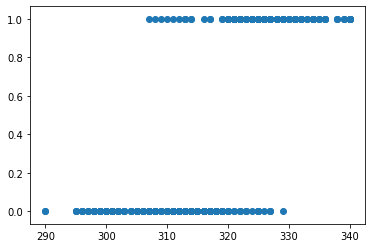

In [28]:
plt.scatter(X_train_arr, Y_train_arr)
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

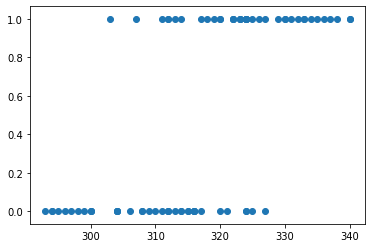

In [29]:
plt.scatter(X_test_arr, Y_test_arr)
plt

### **Initializing Parameters**

In [30]:
def initialize_with_zeros(dim):
    weight = np.zeros((dim, 1))
    bias = 0
    return weight, bias

### **Hypothesis Function - Sigmoid**

In [31]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### **Cost Function**

In [32]:
def cost_func(x, y, weight, bias):
    m = x.shape[0]
    a = sigmoid(np.dot(x, weight.T) + bias)
    cost = (-1 / m) * np.sum((y * np.log(a), (1-y) * np.log(1-a)))
    return cost

### **Gradient Function**

In [33]:
def grad_func(x, y, weight, bias):
    #cost_eval = cost_func(x, y, weight, bias)
    m = x.shape[0]
    a = sigmoid(np.dot(x, weight.T) + bias)
    cost = (-1 / m) * np.sum((y * np.log(a), (1-y) * np.log(1-a)))
    #print(cost.shape)
    dw = (1/m) * (np.dot(x.T, (a - y.T).T))
    db = (1/m) * (np.sum(a - y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

### **Training Model**

In [34]:
def train(x, y, weight, bias, alpha, iters):
    costs = []
    for i in range(iters):
        grads, cost = grad_func(x, y, weight, bias)
        dw = grads["dw"]
        db = grads["db"]
        weight = weight - (alpha * (dw.T))
        bias = bias - (alpha * db)
        
        # Log Progress
        if i % 100 == 0:
            costs.append(cost)
            
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    coeff = {"w": weight, "b": bias}
    gradient = {"dw": dw, "db": db}

    
    return coeff, gradient, costs

### **Prediction Function**

In [35]:
def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    y_prediction = []
    for i in range(final_pred.shape[1]):
        if final_pred[0, i] > 0.5:                        
            y_pred[0, i] = 1
        y_prediction.append(y_pred[0, i])
    return y_prediction

### **Model Evaluation**

In [36]:
def model(X_train_arr, Y_train_arr, X_test_arr, Y_test_arr, iters, alpha):
    weight, bias = initialize_with_zeros(X_train_arr.shape[0])
    coeff, gradient, costs = train(X_train_arr, Y_train_arr, weight, bias, alpha, iters)
    weight = coeff["w"]
    bias = coeff["b"]
    a = sigmoid(np.dot(weight.T, X_train_arr) + bias)
    X_prediction_train = predict(a, Y_train_arr.shape[0])
    X_prediction_test = predict(a, Y_test_arr.shape[0])
    print("train accuracy: {} %".format(100 - np.mean(np.abs(X_prediction_train - Y_train_arr)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(X_prediction_test - Y_test_arr)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": X_prediction_test, 
         "Y_prediction_train" : X_prediction_train, 
         "w" : weight, 
         "b" : bias,
         "learning_rate" : alpha,
         "num_iterations": iters}
    return d

In [37]:
d = model(X_train_arr, Y_train_arr, X_test_arr, Y_test_arr, iters = 2000, alpha = 0.0001)

Cost after iteration 0: 221.807098
Cost after iteration 100: 291.824006
Cost after iteration 200: 291.176154
Cost after iteration 300: 289.823609
Cost after iteration 400: 287.157023
Cost after iteration 500: 280.130228
Cost after iteration 600: 275.330137
Cost after iteration 700: 384.413318
Cost after iteration 800: 519.329414
Cost after iteration 900: 663.076414
Cost after iteration 1000: 814.385982
Cost after iteration 1100: 969.493877
Cost after iteration 1200: 1124.886346
Cost after iteration 1300: 1278.469175
Cost after iteration 1400: 1429.344456
Cost after iteration 1500: 1577.328630
Cost after iteration 1600: 1722.589442
Cost after iteration 1700: 1865.433588


C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 58.75 %
test accuracy: 50.0 %


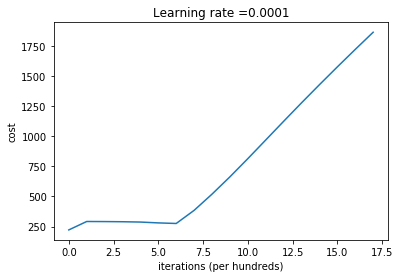

In [38]:
# Plot learning curve (with costs)

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [39]:
d = model(X_train_arr, Y_train_arr, X_test_arr, Y_test_arr, iters = 2000, alpha = 0.001)

Cost after iteration 0: 221.807098


C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 100: 3935.989389
Cost after iteration 200: 2537.044348
Cost after iteration 300: 3489.485960
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan


C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Cost after iteration 1900: nan
train accuracy: 58.75 %
test accuracy: 50.0 %


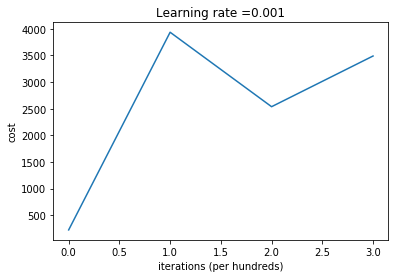

In [40]:
# Plot learning curve (with costs)

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [41]:
d = model(X_train_arr, Y_train_arr, X_test_arr, Y_test_arr, iters = 2000, alpha = 0.01)

Cost after iteration 0: 221.807098


C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 100: 29046.762103
Cost after iteration 200: nan
Cost after iteration 300: 29746.831627
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan


C:\Users\91939\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
train accuracy: 41.25 %
test accuracy: 50.0 %


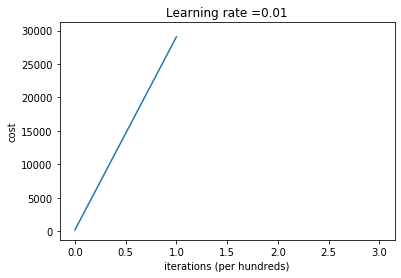

In [42]:
# Plot learning curve (with costs)

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()